+++
notebook = true
date = "2021-04-14"
title = "A test with nodal source term"
weight = 151
project = ["HydroMechanics/NodalSourceTerm/nodal_source_test.prj"]
author = "Wenqing Wang, Noor Hasan"
web_subsection = "hydro-mechanics"
+++


<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./Nodal-source-test.ipynb" download="Nodal-source-test.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=Nodal-source-test.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/HydroMechanics/NodalSourceTerm/Nodal-source-test.py"><img src="https://img.shields.io/static/v1?label=Source:&message=Nodal-source-test.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/6.5.6-0.7.0?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/HydroMechanics/NodalSourceTerm/Nodal-source-test.py%26branch=master%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

The purpose of this benchmark is to test the source term type of NodalSourceTerm
being applied to the hydraulic equation in the computations with the Taylor-Hood
elements, e.g., the pressure interpolation using linear shape function, and the
displacement interpolation using quadratic shape function.

The problem is solved on a rectangular domain $2m \times 1m$.
Nodal fluid flux is applied on the left boundary nodes with a value of 0.001 $kg/s$
via the property of NodalSourceTerm.
The pore pressure on the right boundary is equal to the initial pore pressure of
$10⁵$ $Pa$.
The displacement in the normal direction of all boundaries except the left one is fixed.

Fluid and solid are incompressible.

All involved parameters are listed in the following tables:

| Property | Value | Unit |
| :--- | :--- | :--- |
| Fluid density | $10^3$ | $\mathrm{kg} / \mathrm{m}^3$ |
| Viscosity | $10^{-3}$ | Pa.s |
| Permeability | $10^{-14}$ | $\mathrm{m}^2$ |
| Young's modulus (bulk) | $2.5 \cdot 10^9$ | Pa |
| Poisson ratio (bulk) | 0.27 | - |
| Biot coefficient | 0.9 | - |

The time period of 86400s (1 day) is discretised into 100 steps.

In [1]:
# importing libraries
import os
from pathlib import Path

import matplotlib.pyplot as plt
import ogstools as ot
from ogstools.meshlib import MeshSeries

In [2]:
# creating output path if it doesn't exist already.
out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
out_dir.mkdir(parents=True, exist_ok=True)

In [3]:
# Initiate the OGS
model = ot.Project(
    input_file="nodal_source_test.prj", output_file="nodal_source_test.prj"
)

In [4]:
# Run the simulation
model.run_model(logfile=Path(out_dir) / "log.txt")

Project file written to output.
Simulation: nodal_source_test.prj
Status: finished successfully.
Execution took 0.8262348175048828 s


The distributions of pressure and displacement at the end time are
shown in the following figure:

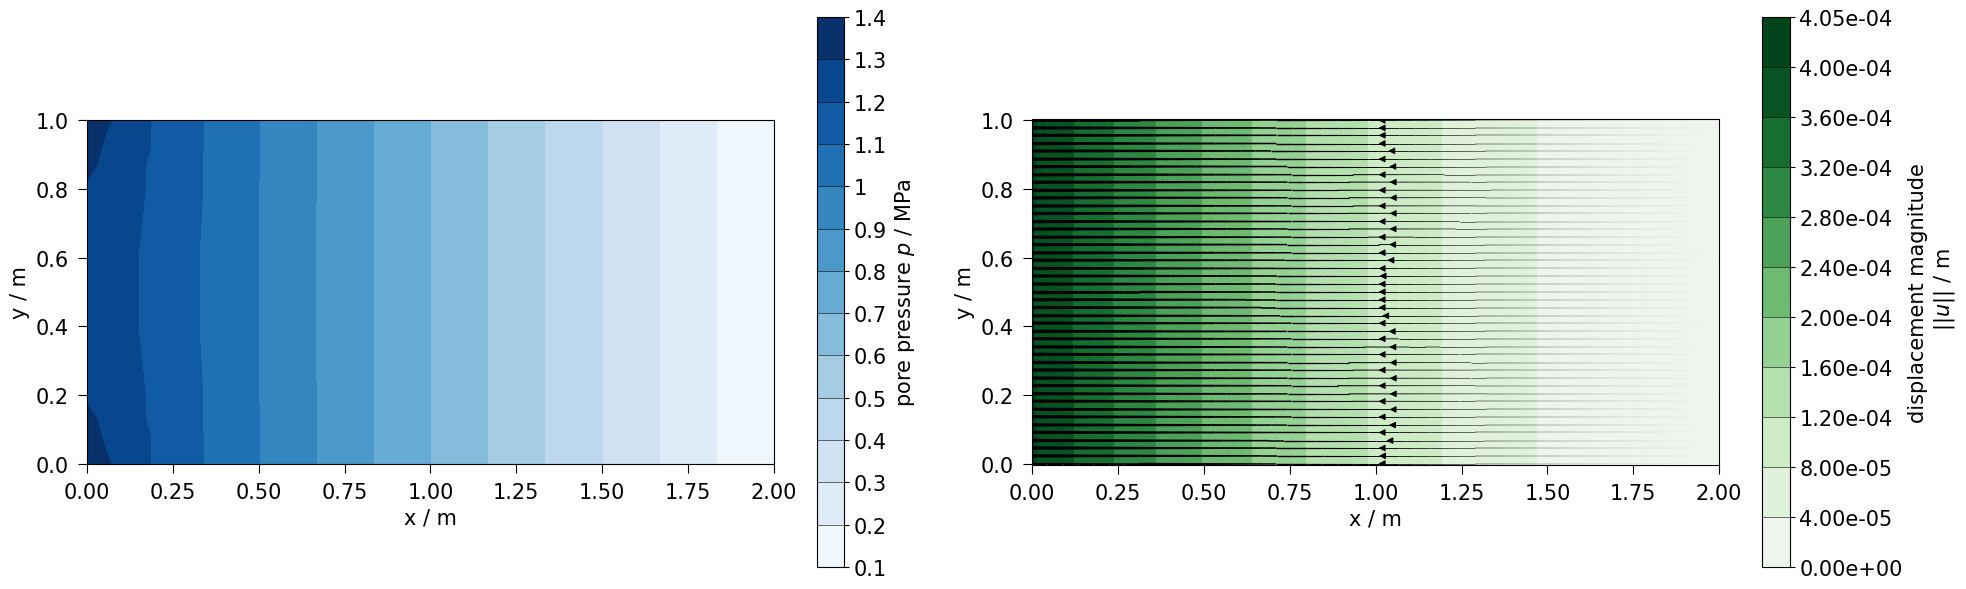

In [5]:
# Plotting
mesh = MeshSeries("HM_NodalSourceTem.pvd").mesh(20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

mesh.plot_contourf(
    ot.variables.pressure.replace(data_name="pressure_interpolated"),
    fig=fig,
    ax=ax1,
    fontsize=15,
)
mesh.plot_contourf(ot.variables.displacement, fig=fig, ax=ax2, fontsize=15)

plt.subplots_adjust(wspace=0.3)  # increase horizontal space
plt.tight_layout()
plt.show()